# Tugas Praktikum

Download dataset Mall_Customers

#### Tugas

Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

### Jawab


1. Load Data

In [69]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/Mall_Customers.csv')


# Label encode
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


2. Memilih fitur

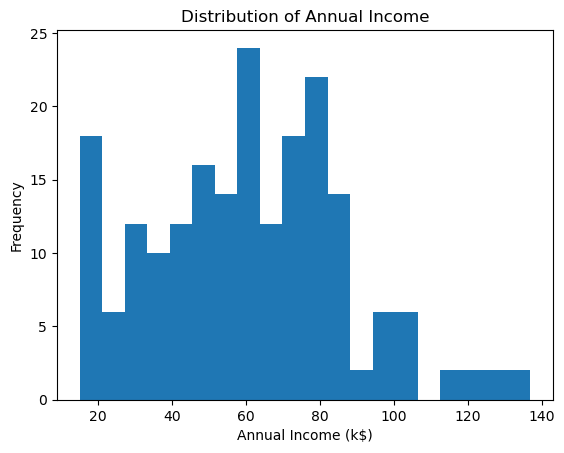

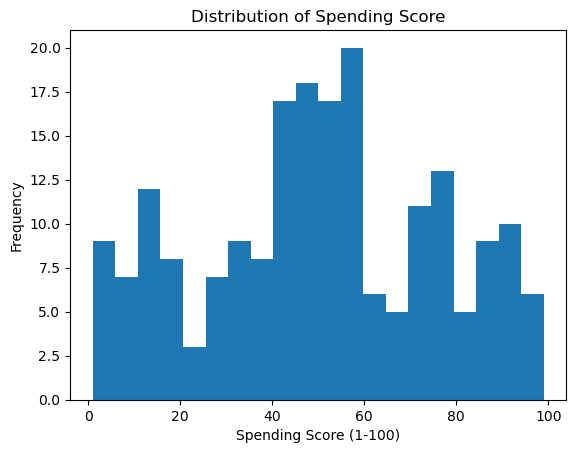

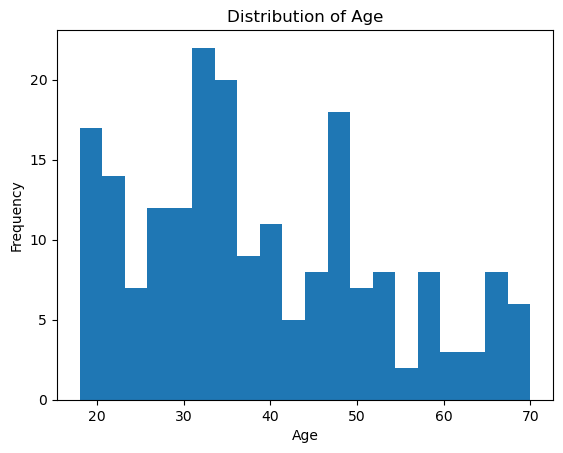

In [70]:
import matplotlib.pyplot as plt

# Analisis sebaran Annual Income (k$)
plt.hist(data['Annual Income (k$)'], bins=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()

# Analisis sebaran Spending Score (1-100)
plt.hist(data['Spending Score (1-100)'], bins=20)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score')
plt.show()

# Analisis sebaran Age
plt.hist(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


In [71]:
correlation = data[['Annual Income (k$)', 'Spending Score (1-100)','Age','Gender']].corr()
print(correlation)


                        Annual Income (k$)  Spending Score (1-100)       Age  \
Annual Income (k$)                1.000000                0.009903 -0.012398   
Spending Score (1-100)            0.009903                1.000000 -0.327227   
Age                              -0.012398               -0.327227  1.000000   
Gender                           -0.056410                0.058109 -0.060867   

                          Gender  
Annual Income (k$)     -0.056410  
Spending Score (1-100)  0.058109  
Age                    -0.060867  
Gender                  1.000000  


Karena korelasi antar calon fitur masih sangat rendah, maka saya coba melakukan scalling

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

selected_features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(selected_features)
scaled_df = pd.DataFrame(scaled_data, columns=selected_features.columns)


In [73]:
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [74]:
correlation = scaled_df[['Annual Income (k$)', 'Spending Score (1-100)','Age']].corr()
print(correlation)

                        Annual Income (k$)  Spending Score (1-100)       Age
Annual Income (k$)                1.000000                0.009903 -0.012398
Spending Score (1-100)            0.009903                1.000000 -0.327227
Age                              -0.012398               -0.327227  1.000000


Wah ternyata sama saja,

## Menggunakan uji anova (analysis of variance)

In [75]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt



In [76]:
data = pd.read_csv('data/Mall_Customers.csv')


In [77]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = data['Gender']  # Variabel target (jika ada)


## Melakukan uji Anova

Gunakan SelectKBest dari Scikit-Learn dengan metode f_classif (Anova) untuk mengukur kepentingan statistik dari masing-masing fitur terhadap variabel target.

In [78]:
# Mengevaluasi fitur menggunakan Anova
selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)

# Hasil skor Anova untuk setiap fitur
scores = pd.DataFrame({'Feature': X.columns, 'Anova Score': fit.scores_})


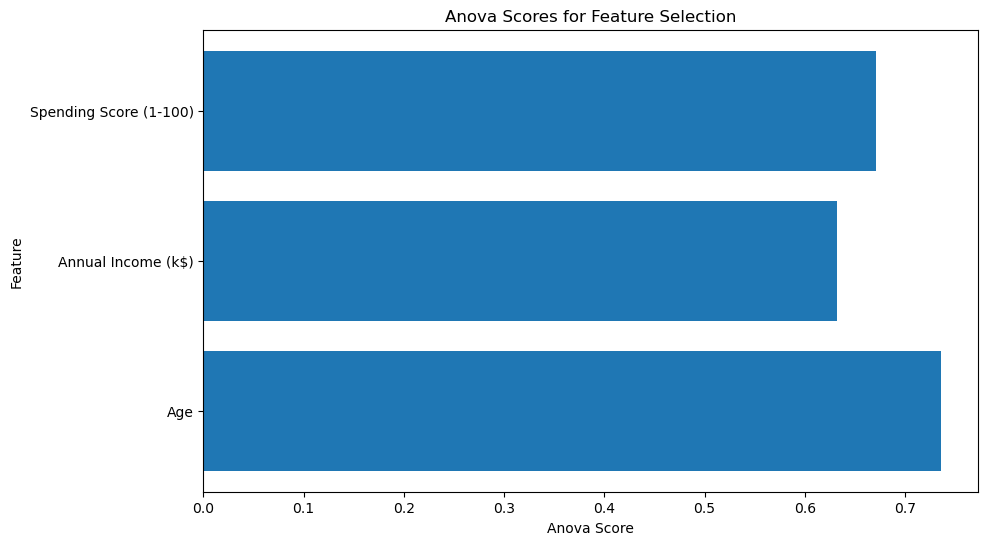

In [79]:
# Memilih fitur terbaik
selected_features = scores.nlargest(3, 'Anova Score')  # Contoh: Memilih 3 fitur terbaik

# Visualisasikan skor Anova
plt.figure(figsize=(10, 6))
plt.barh(scores['Feature'], scores['Anova Score'])
plt.xlabel('Anova Score')
plt.ylabel('Feature')
plt.title('Anova Scores for Feature Selection')
plt.show()

Oke Karena semua di atas 0.5 kita akan memakain 3 fitur

3. Menentukan jumlah cluster (dengan elbow)

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

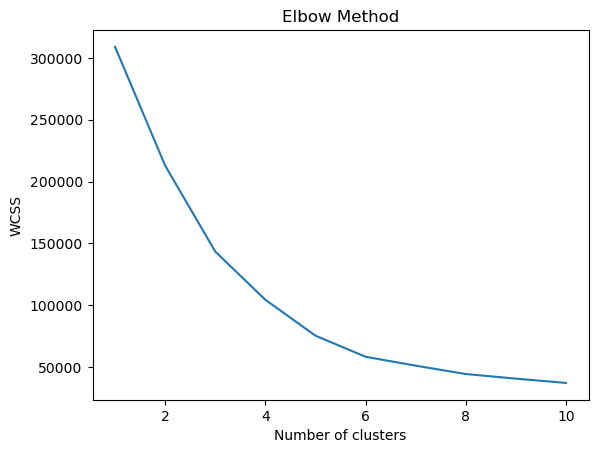

In [80]:
# Find the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


wow karena wcss masih tinggi, kita coba scalling dulu sebelum mencari cluster

In [81]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Label Encode Gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Scalling fitur
scaler = StandardScaler()
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X = scaler.fit_transform(X)


In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0) 

kmeans.fit(X)

# Cek inertia, apabia nilai inertia kecil maka model sudah cukup baik
kmeans.inertia_

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



168.24758017556837

Wah masih tinggi, saya coba ganti metode scalling menggunakan min max

In [83]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

scaler = MinMaxScaler()
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X = scaler.fit_transform(X)

In [84]:
from sklearn.cluster import KMeans

kmeans_test_aja = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0) 

kmeans_test_aja.fit(X)

# Cek inertia, apabia nilai inertia kecil maka model sudah cukup baik
kmeans_test_aja.inertia_

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



17.370109472896697

Nah ini baru mantap rendah, oke lanjut ke tahap selanjutnya


3b. Menentukan jumlah cluster (terbaru, dengan elbow method)

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

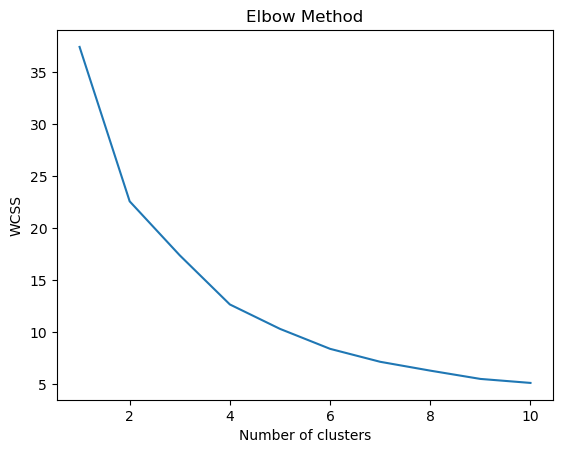

In [85]:
# Find the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


terlihat di 3 mulai landai, jadi kita pilih 3 cluster

4. Pelatihan model K-Means

In [86]:
# Train the K-Means model with the chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3, n_init=10, random_state=0)

5. Menambahkan label cluster pada data

In [87]:
# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_


6. Visualisasi hasil clustering

In [88]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [89]:
import plotly.express as px

# Create a DataFrame with the clustered data
clustered_data = pd.DataFrame({'Annual Income (k$)': X[:, 0],
                               'Spending Score (1-100)': X[:, 1],
                               'Age': X[:, 2],
                               'Cluster': kmeans.labels_})

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(clustered_data, x='Annual Income (k$)',
                    y='Spending Score (1-100)', z='Age', color='Cluster', size_max=10)

# Customize the appearance of the plot
fig.update_traces(marker=dict(size=4))

# Set axis labels and title
fig.update_layout(scene=dict(xaxis_title='Annual Income (k$)', yaxis_title='Spending Score (1-100)', zaxis_title='Age'),
                  title='K-Means Clustering (Interactive 3D)')

# Show the interactive plot
fig.show()

## Itu tadi adalah untuk tugas Nomor 1 dan 2, sekarang nomor 3

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\izam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

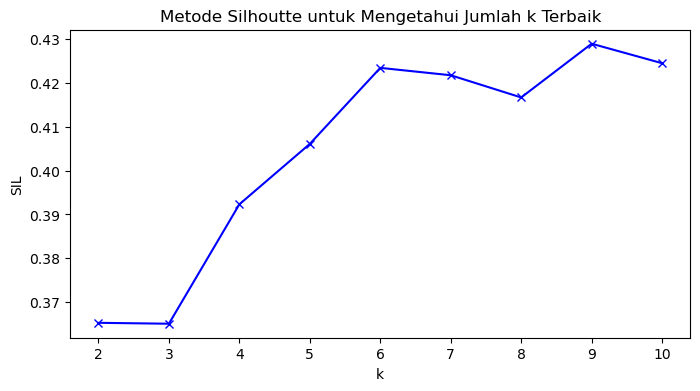

In [90]:
# Silhouette Method
from sklearn.metrics import silhouette_score

sil = []
kmax = 10
K = range(2, kmax+1)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(8, 4))
plt.plot(K, sil, "bx-")
plt.xlabel("k")
plt.ylabel("SIL")
plt.title("Metode Silhoutte untuk Mengetahui Jumlah k Terbaik")
plt.show()

### Analisis:

Setelah melakukan analisis menggunakan metode elbow dan silhouette untuk menentukan jumlah cluster (k) yang optimal, kami menemukan bahwa k=3 adalah yang paling sesuai. Keputusan ini didasarkan pada temuan bahwa skor Silhouette yang paling rendah terjadi saat k=3 dan skor inertia yang cukup tinggi pada peringkat kedua dalam metode elbow. Lebih lanjut, penggunaan k=3 adalah pilihan yang paling tepat karena sebenarnya hanya ada dua label dalam dataset ini, yaitu "Male" dan "Female." Oleh karena itu, memilih k=3 adalah solusi yang paling masuk akal untuk menghasilkan skor inertia atau Sum of Squared Errors (SSE) yang optimal.

#### Nomor 4 di file beda